# INNE - Isolation-based anomaly detection using nearest-neighbor ensembles.
### The INNE algorithm uses the nearest neighbour ensemble to isolate anomalies. It partitions the data space into regions using a subsample and determines an isolation score for each region. As each region adapts to local distribution, the calculated isolation score is a local measure that is relative to the local neighbourhood, enabling it to detect both global and local anomalies. INNE has linear time complexity to efficiently handle large and high-dimensional datasets with complex distributions.
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.inne

### Arguments that work with INNE algorithm:
1. n_estimators
2. max_samples
3. contamination
4. random_state

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N = 100, config_num=6, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

get2D                    ...took   292.996742 seconds
image downsampling       ...took     8.939953 seconds
image downsampling       ...took    12.271525 seconds
image downsampling       ...took    15.646656 seconds
image downsampling       ...took    18.983732 seconds
image downsampling       ...took    22.323808 seconds
image downsampling       ...took    25.645581 seconds
image downsampling       ...took    28.961672 seconds
image downsampling       ...took    32.296633 seconds
image downsampling       ...took    35.634514 seconds
image downsampling       ...took    43.066639 seconds
image downsampling       ...took    50.507020 seconds
image downsampling       ...took    57.966812 seconds
image downsampling       ...took    65.687018 seconds
image downsampling       ...took    73.127808 seconds
image downsampling       ...took    76.446580 seconds
image downsampling       ...took    79.757417 seconds
image downsampling       ...took    83.110523 seconds
image downsampling       ...

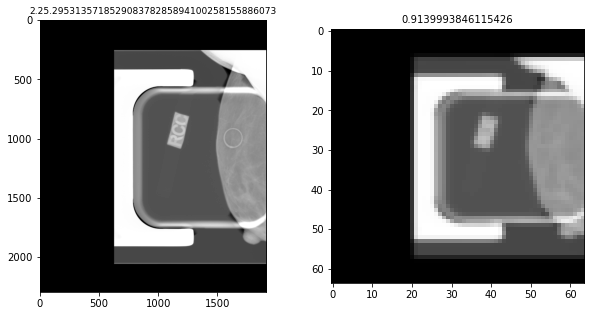

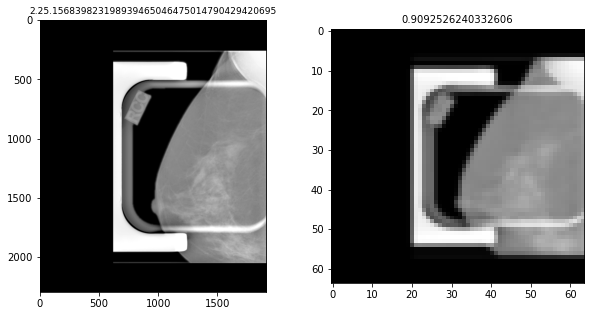

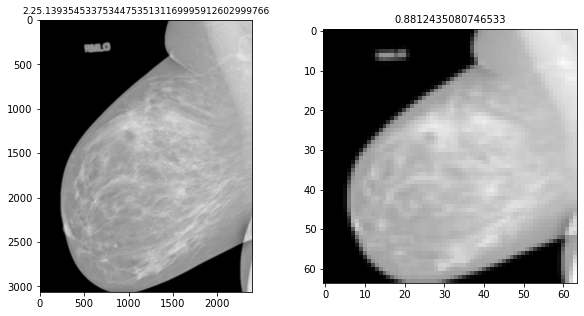

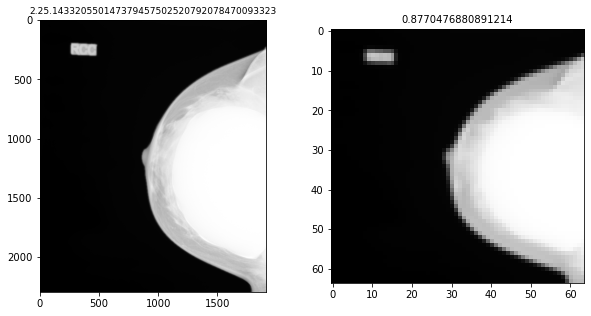

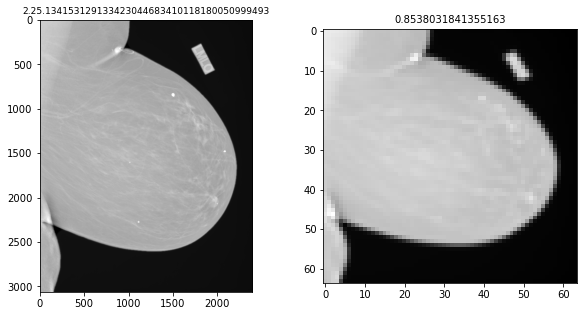

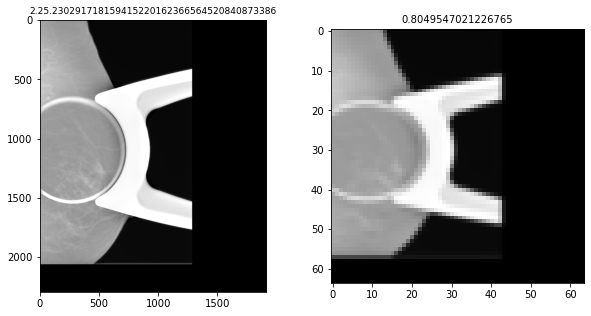

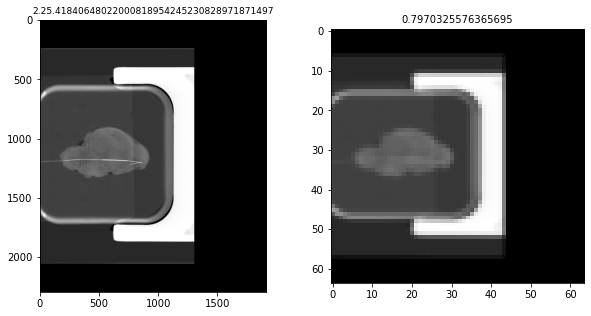

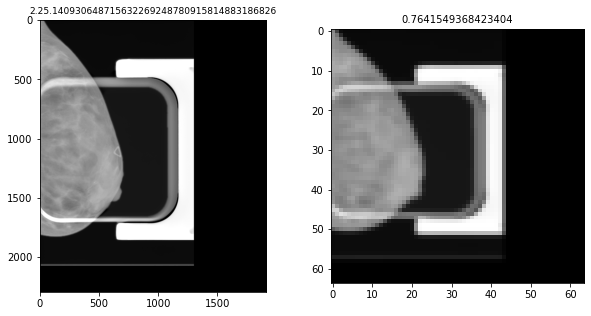

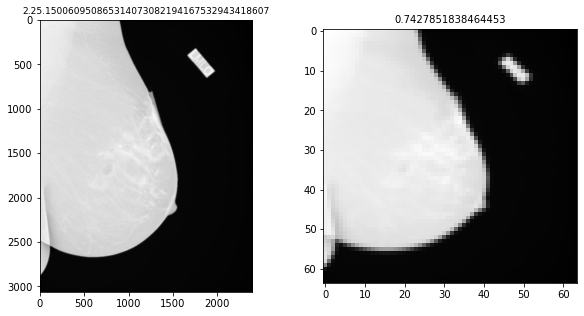

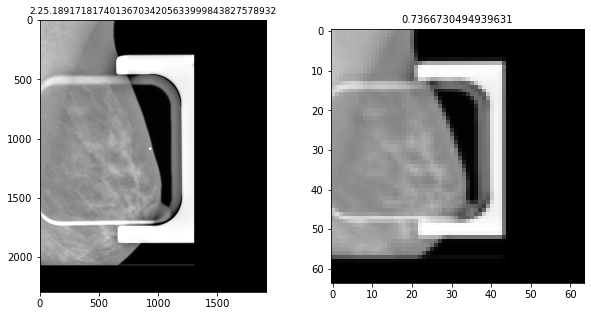

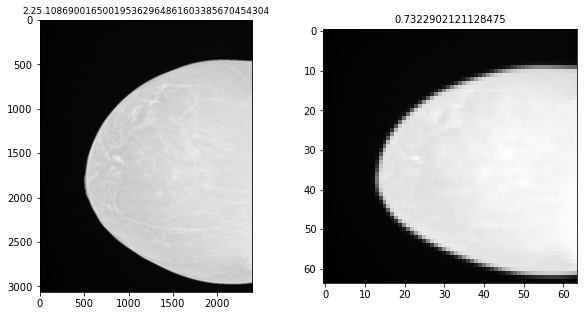

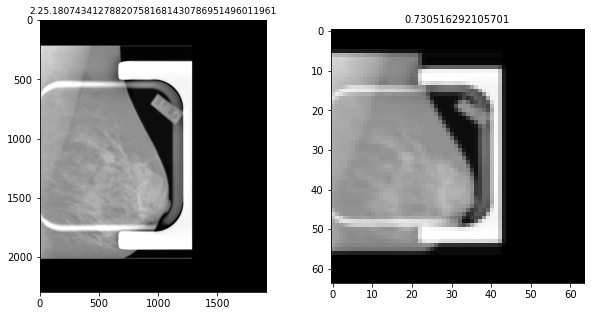

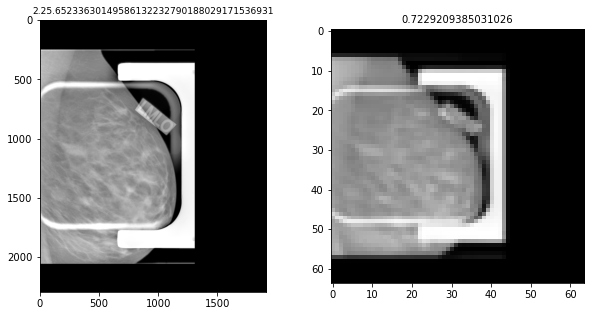

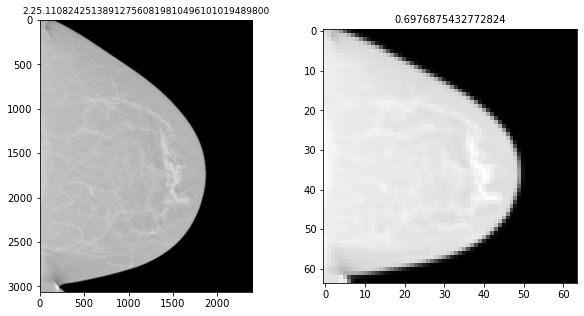

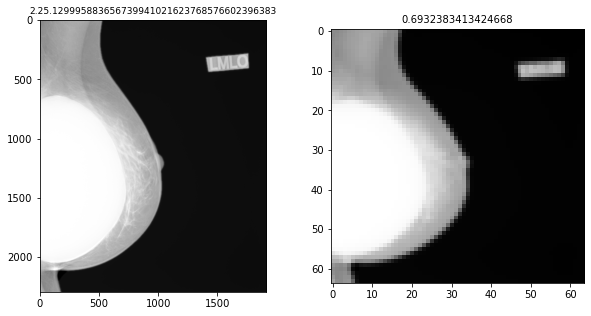

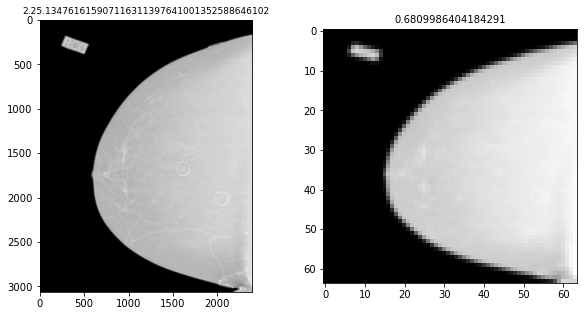

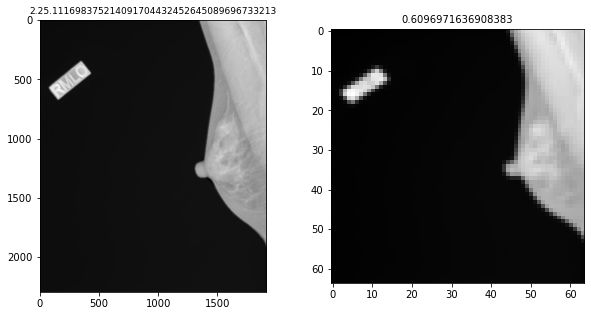

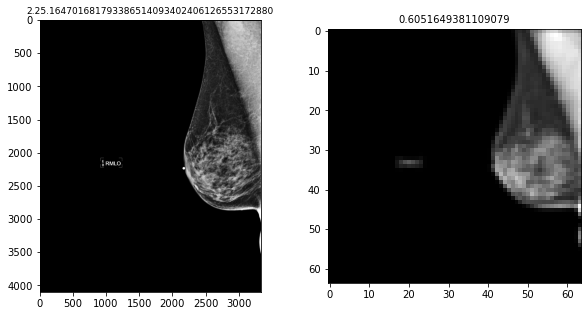

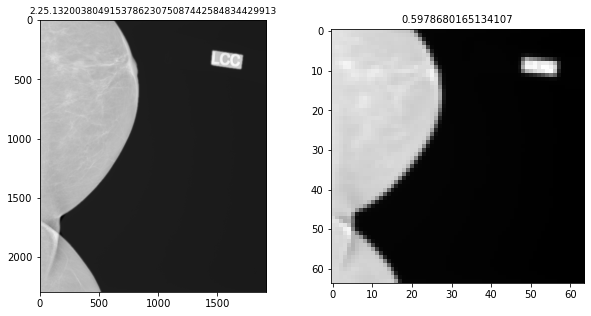

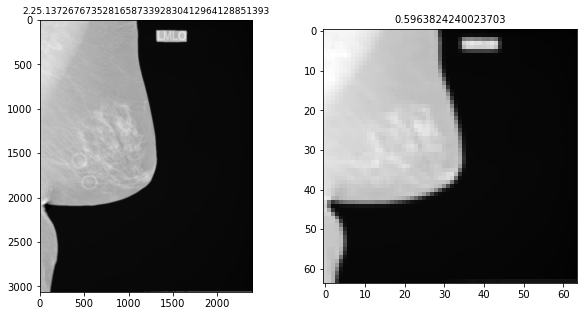

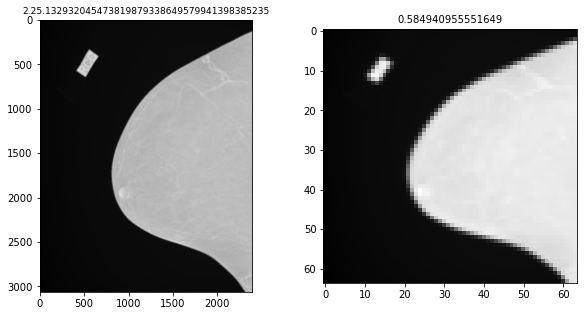

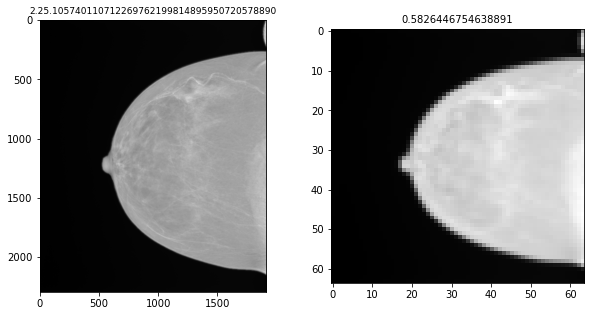

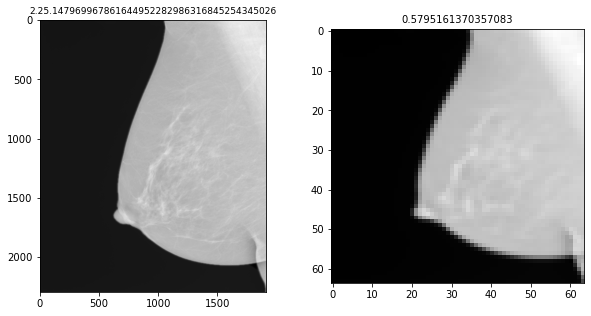

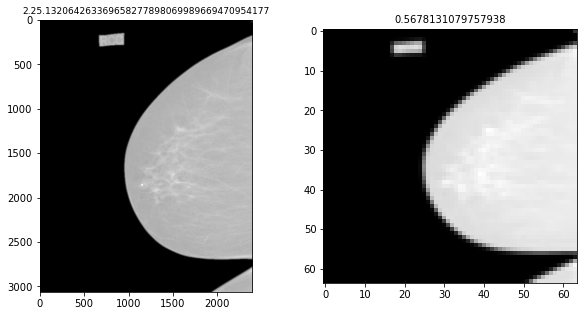

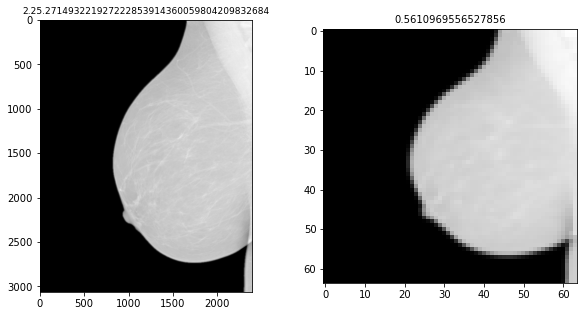

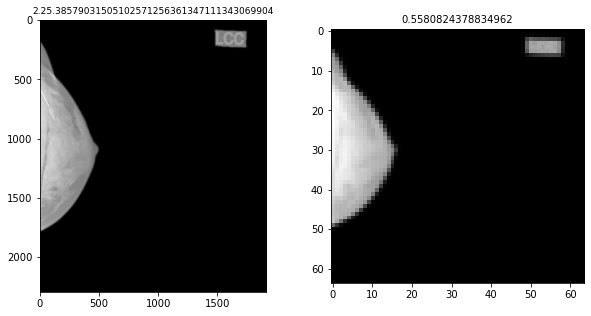

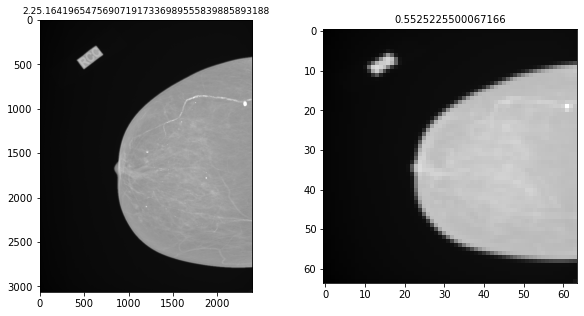

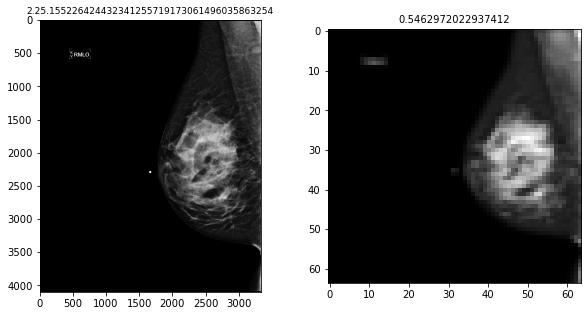

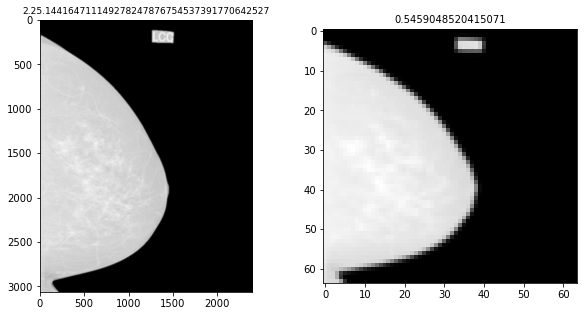

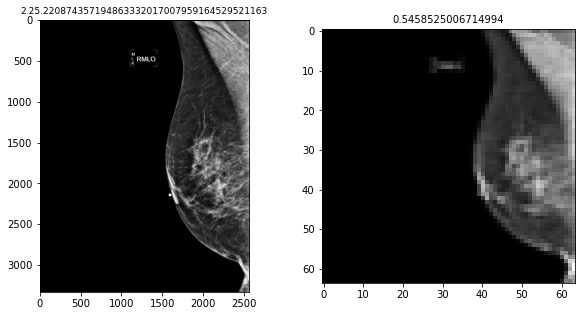

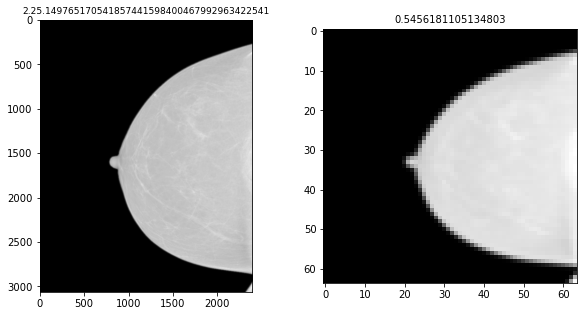

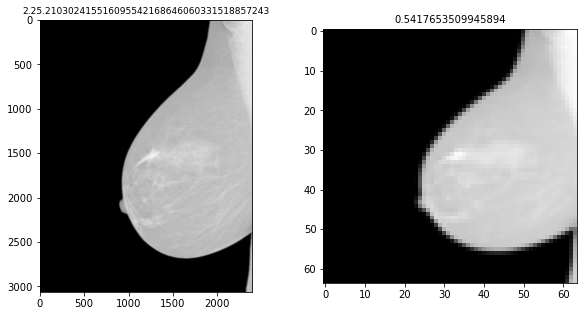

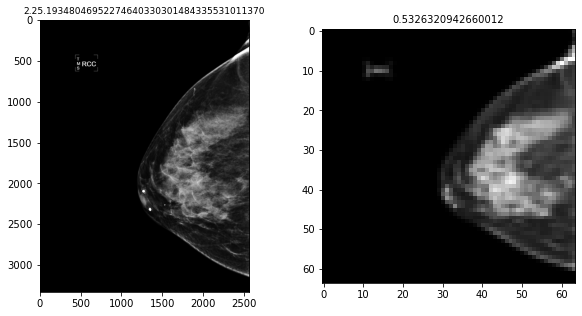

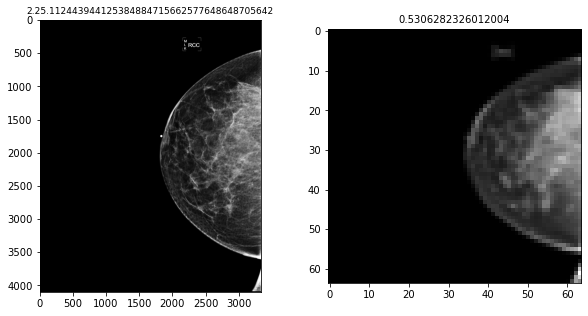

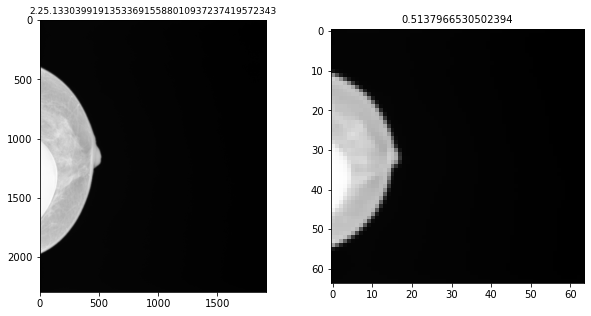

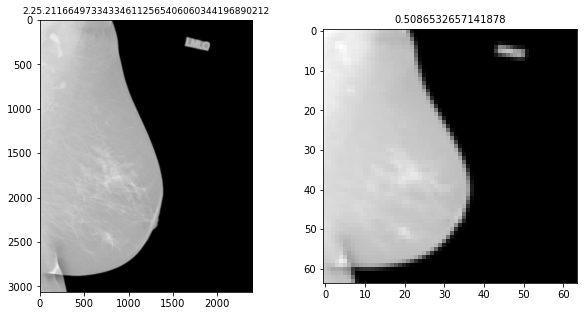

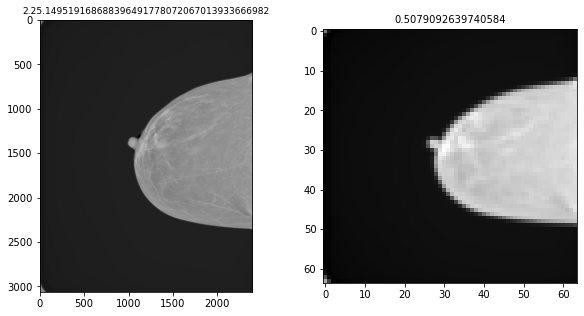

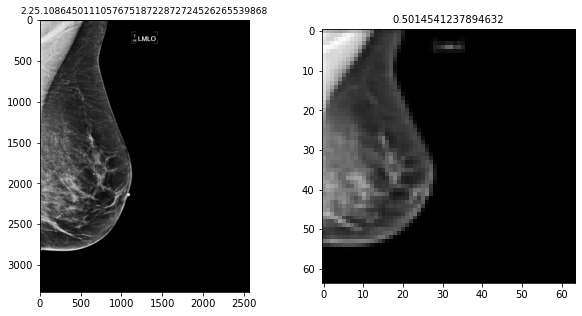

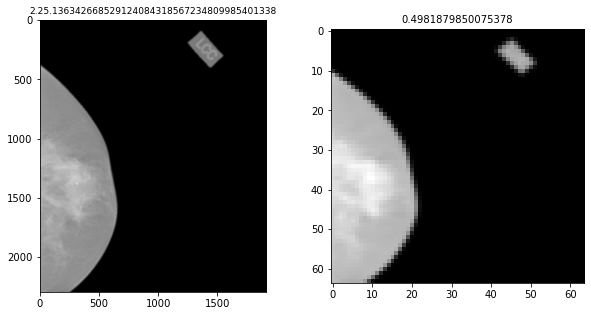

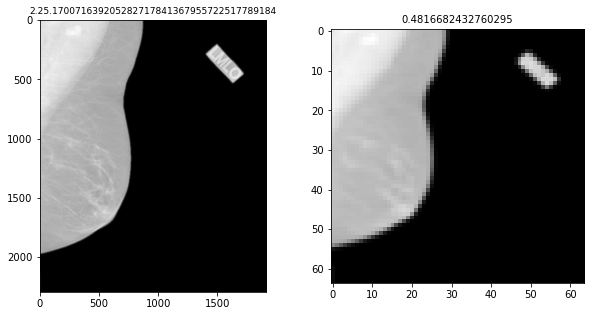

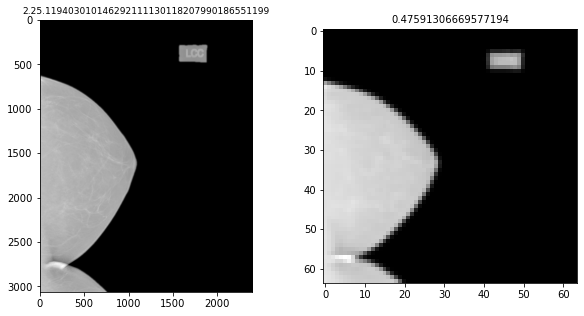

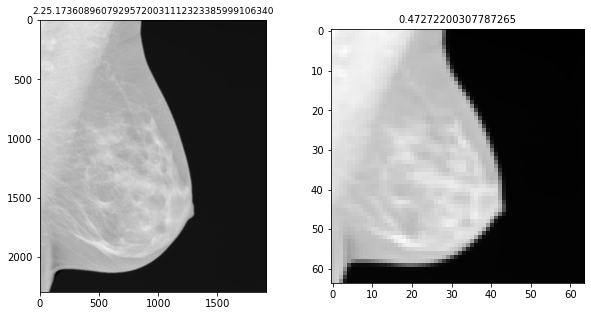

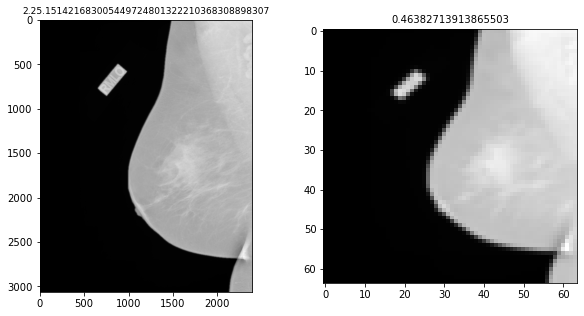

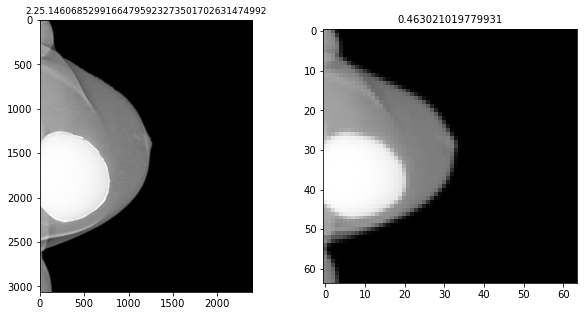

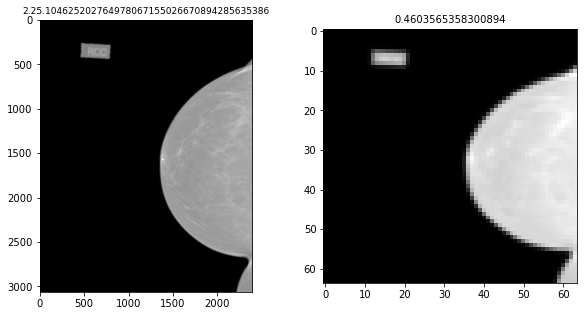

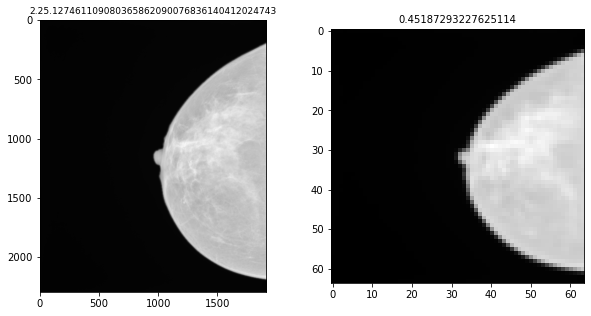

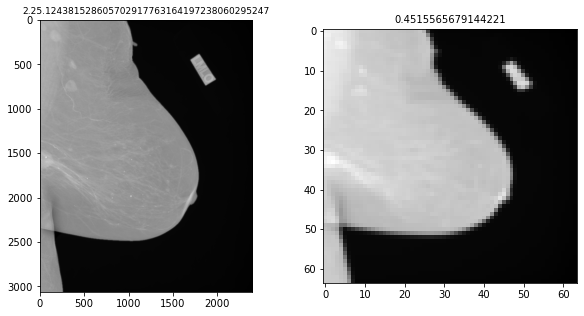

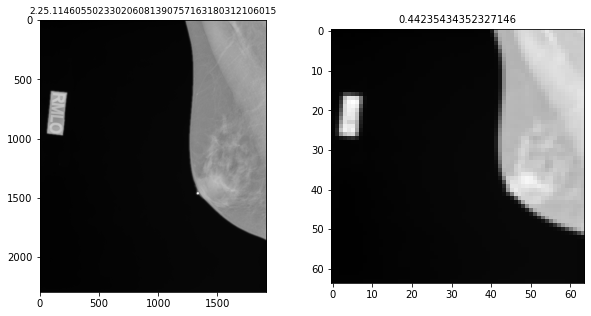

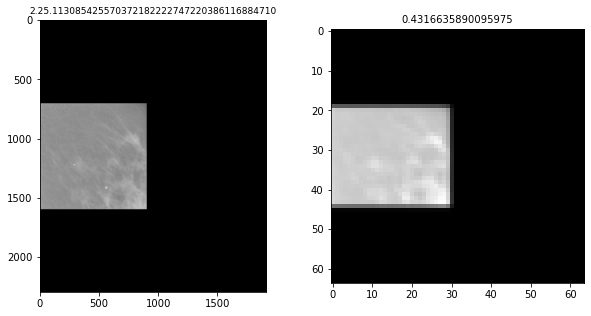

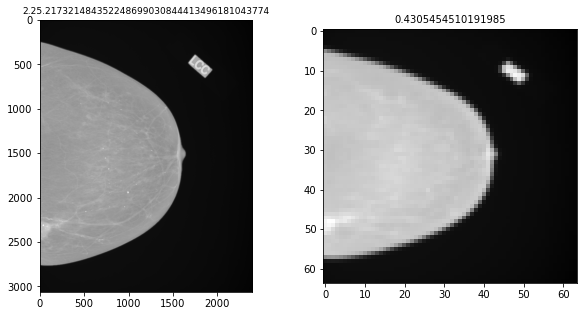

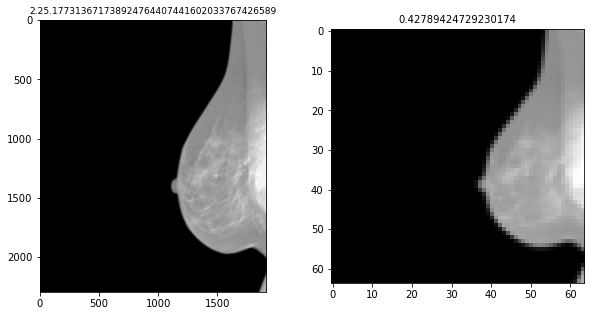

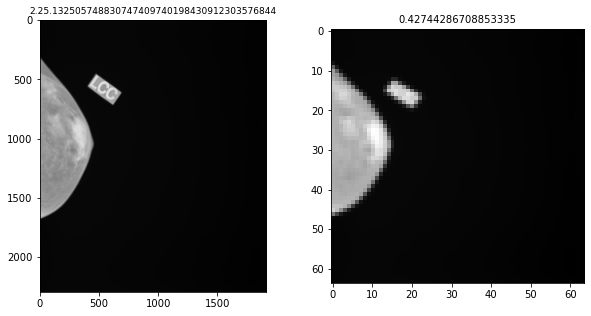

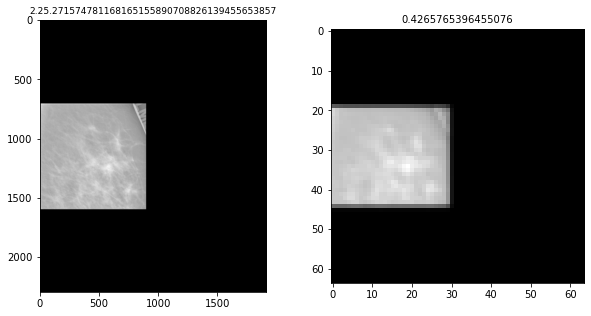

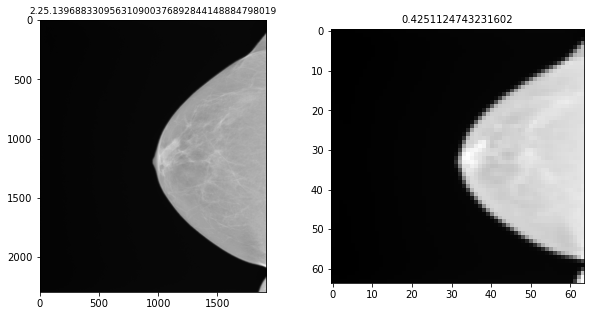

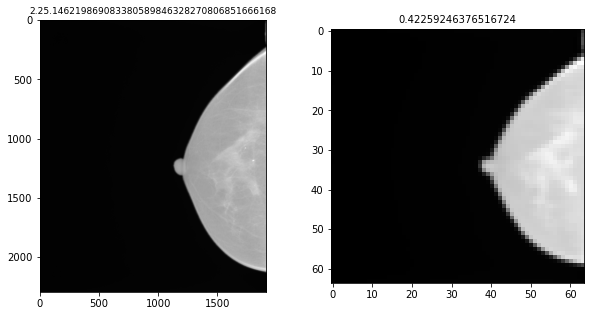

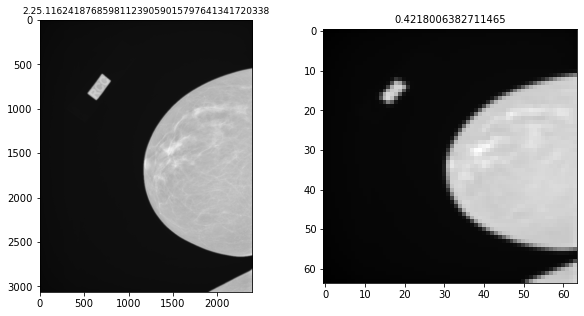

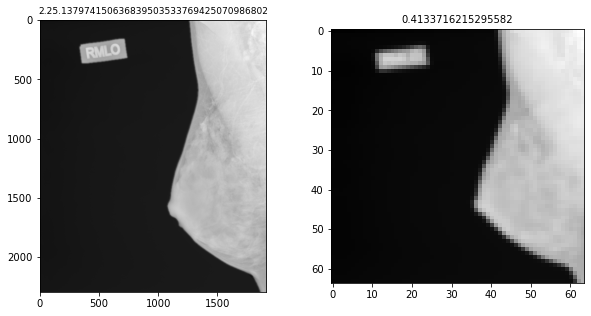

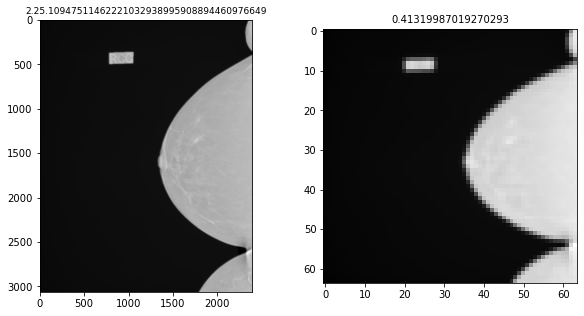

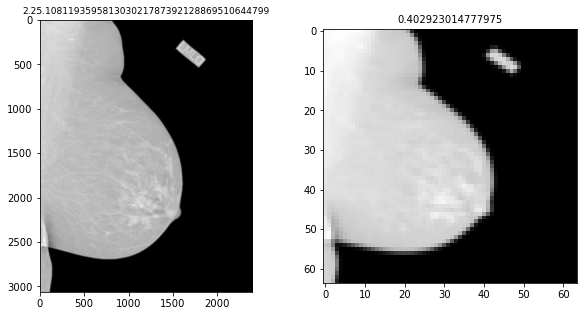

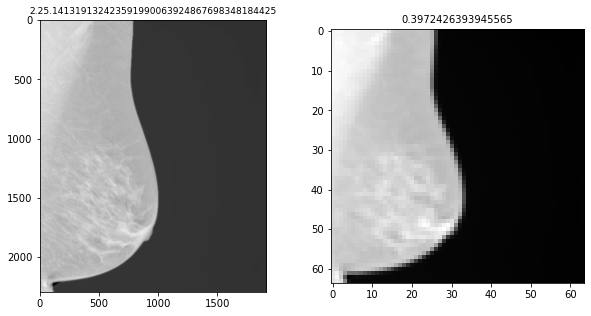

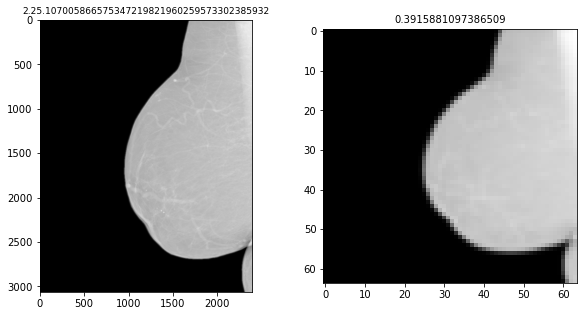

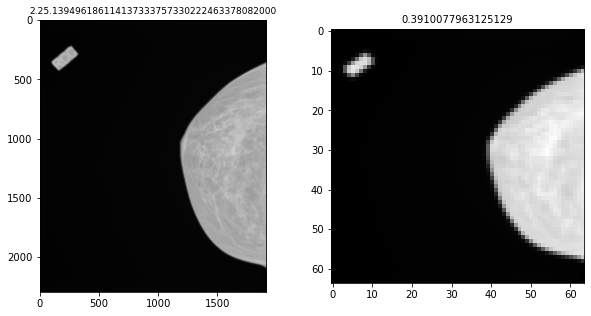

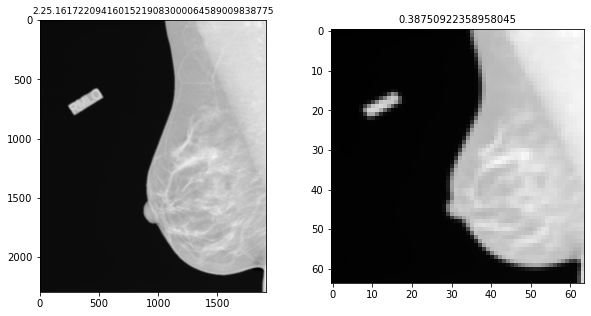

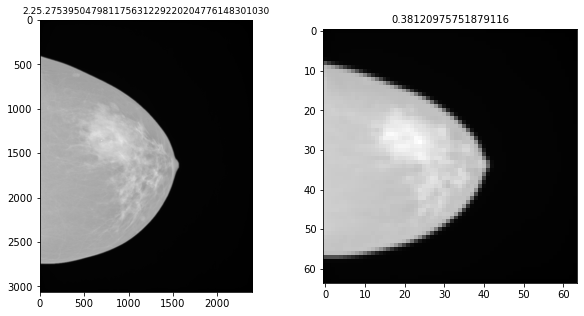

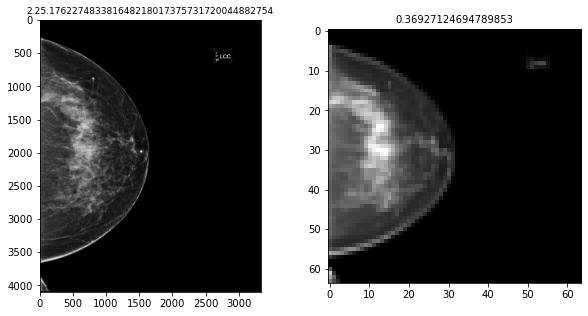

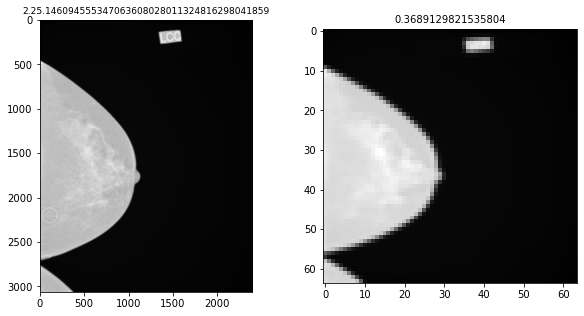

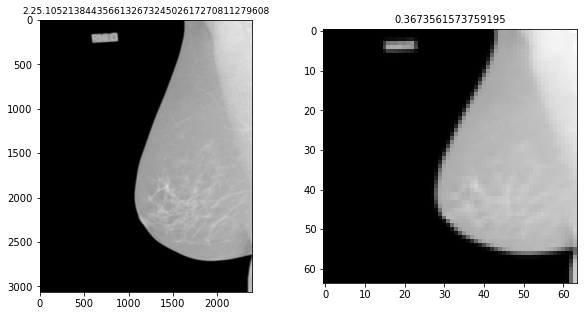

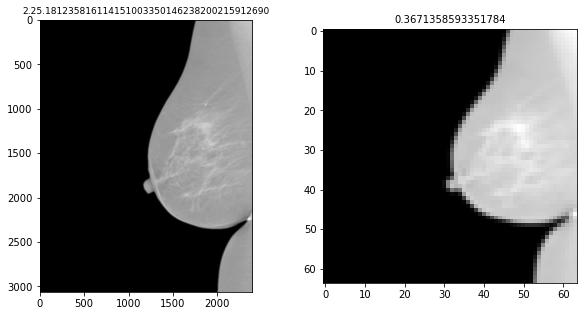

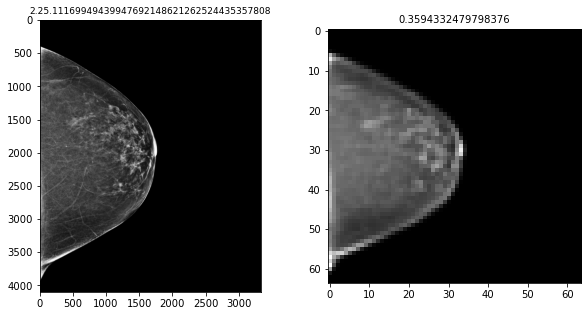

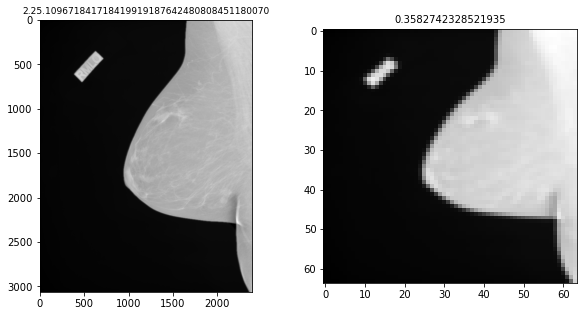

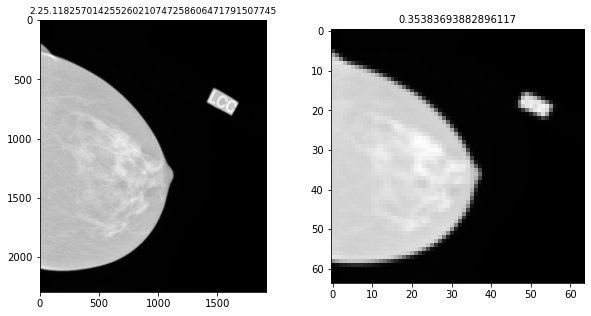

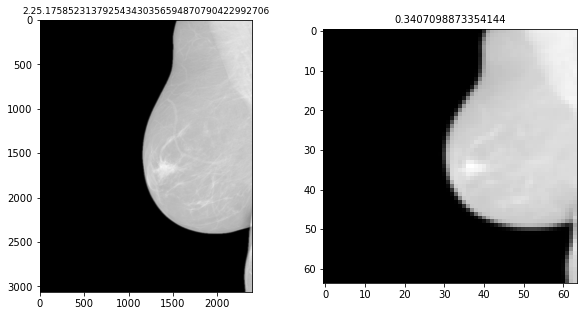

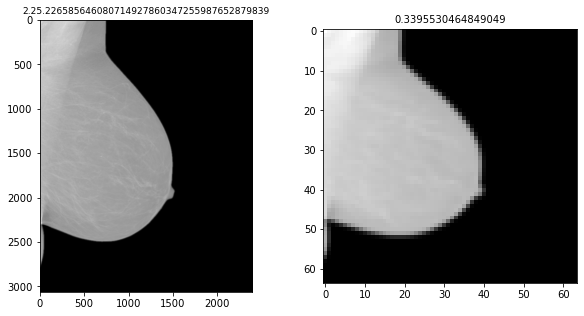

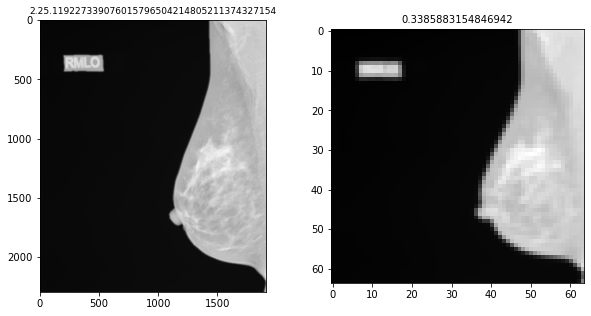

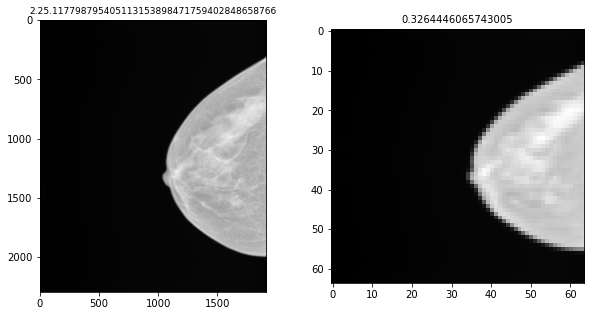

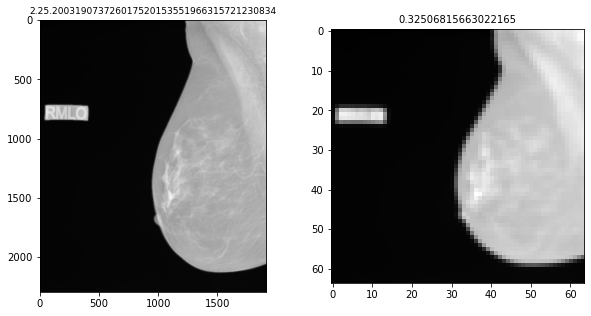

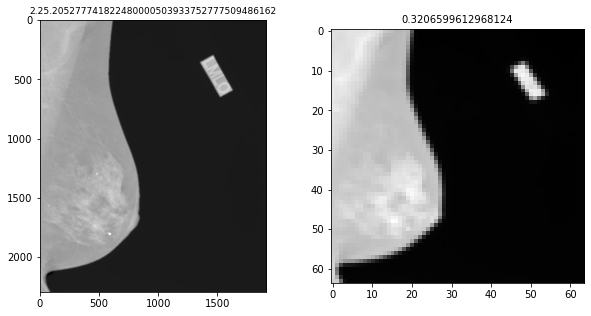

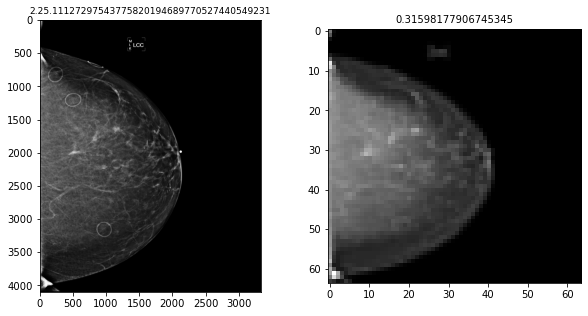

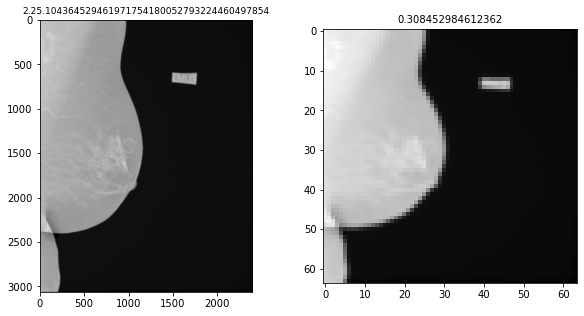

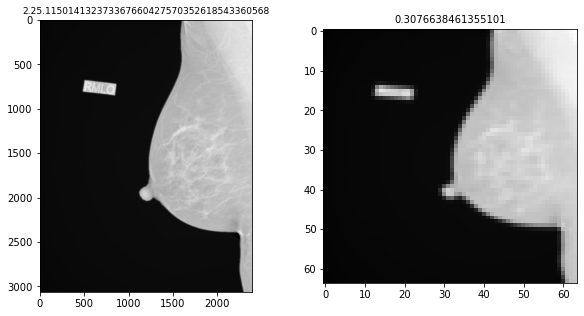

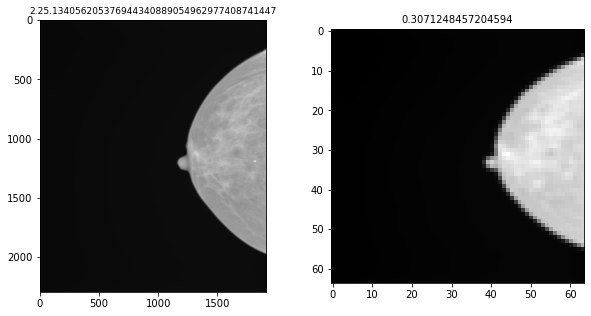

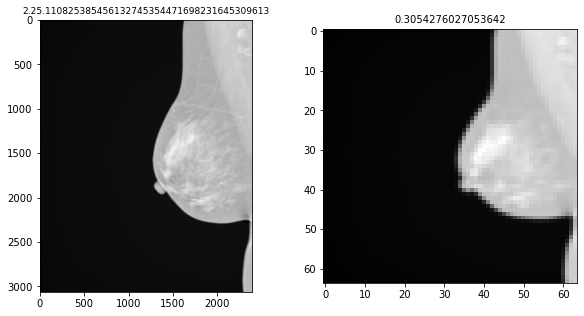

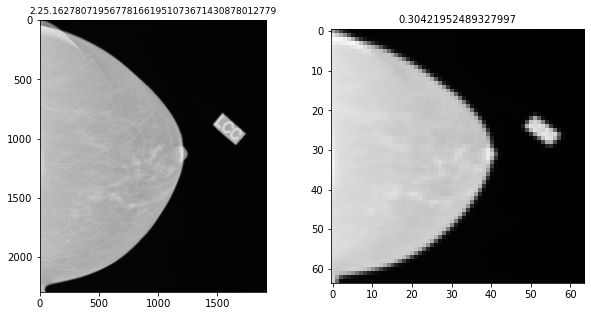

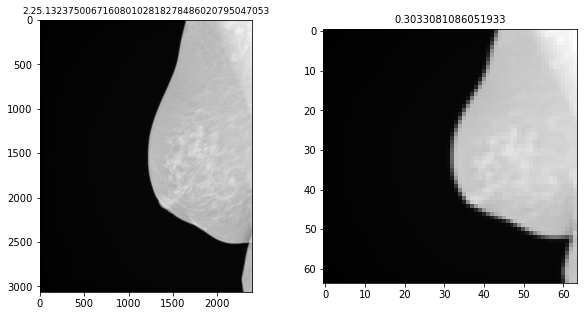

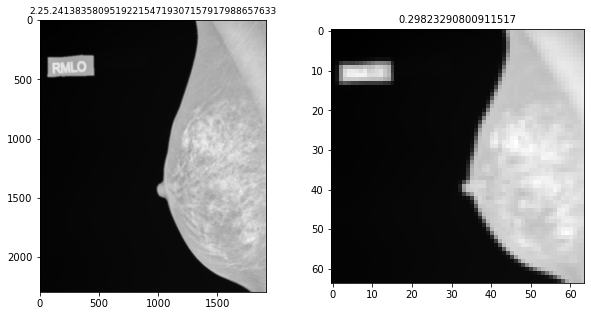

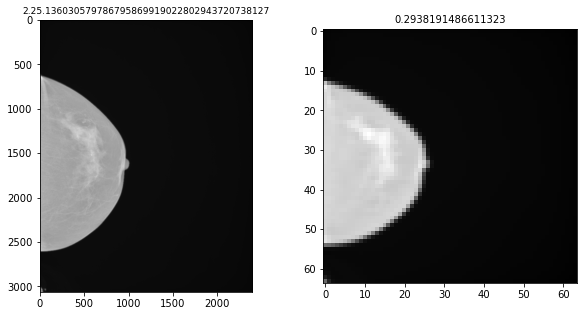

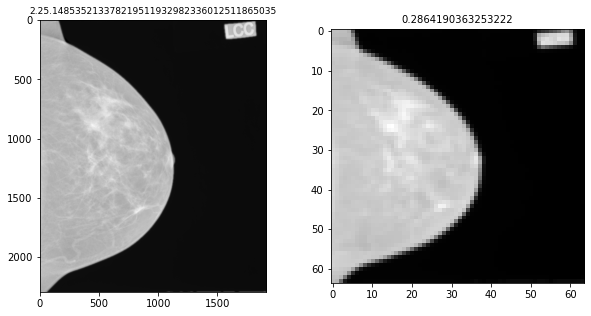

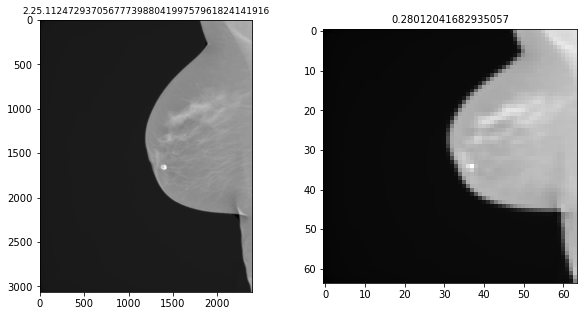

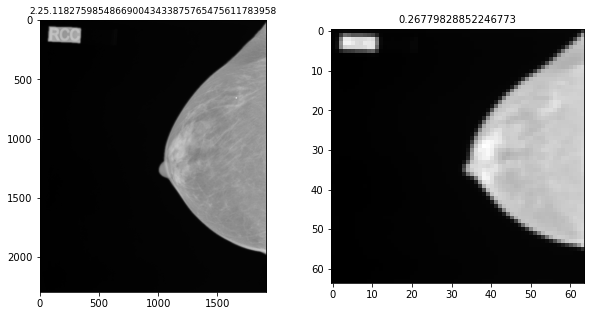

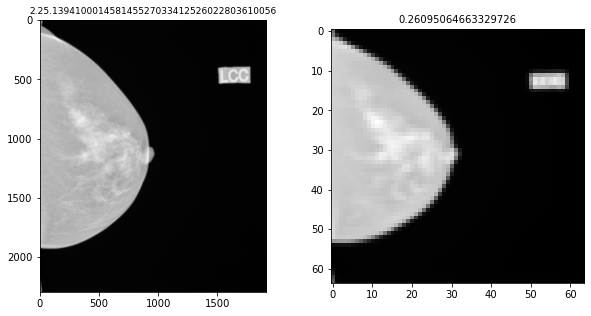

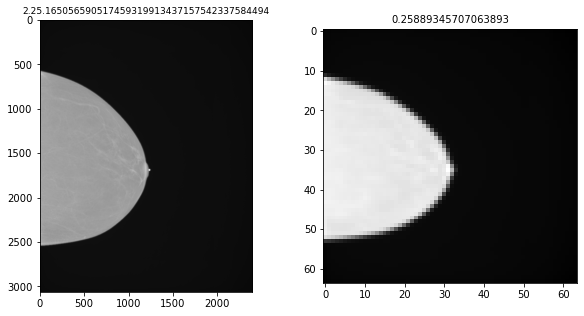

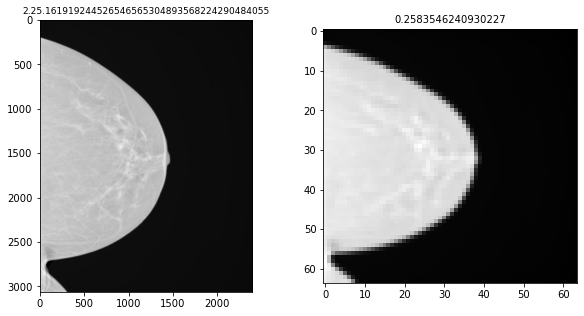

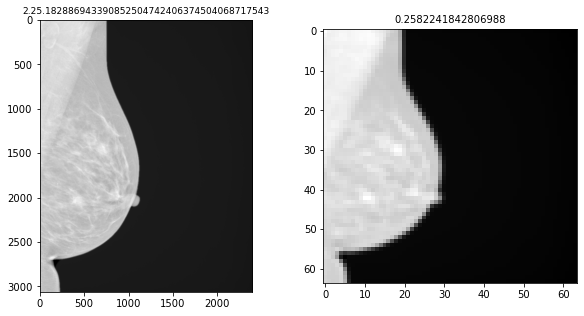

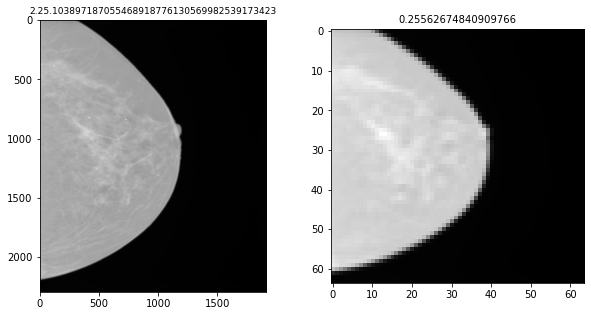

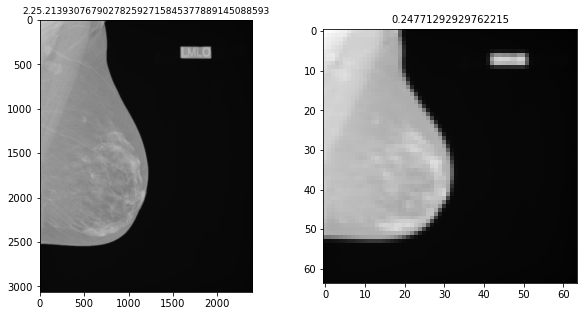

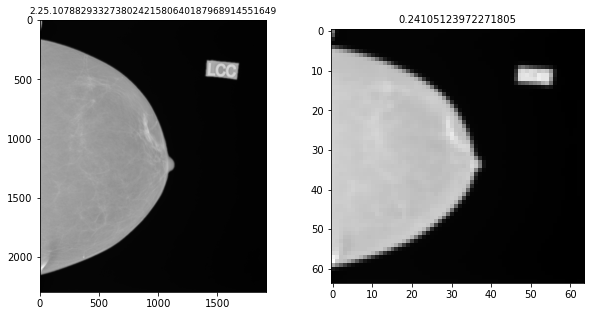

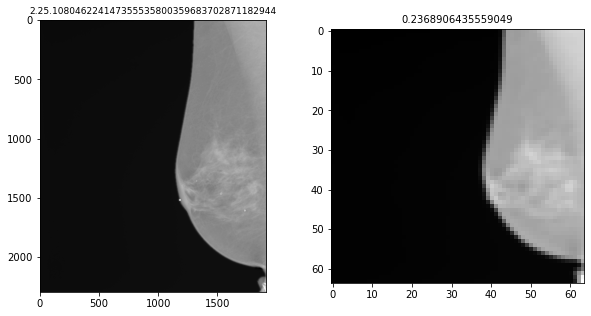

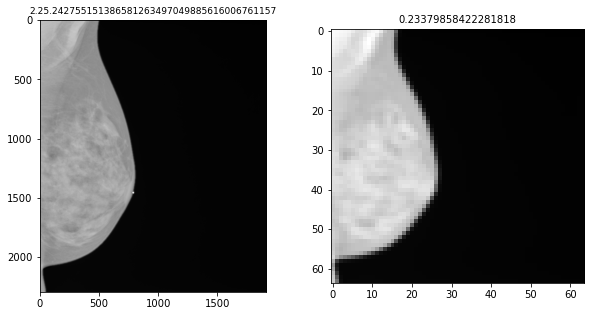

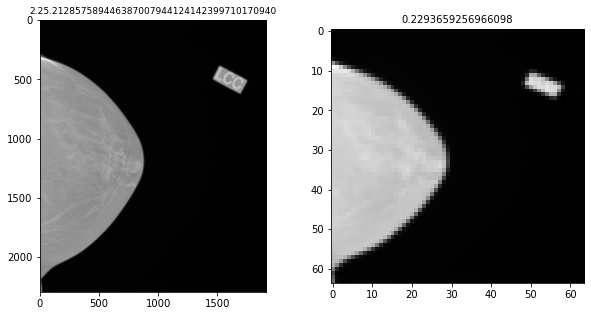

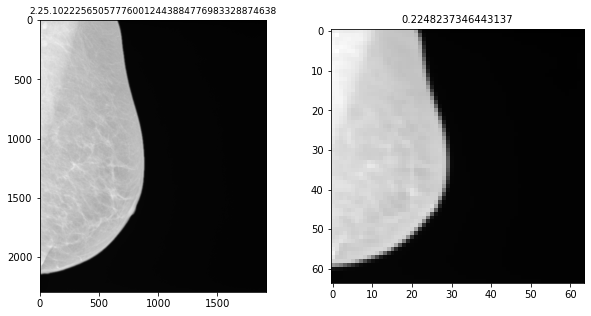

In [3]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='INNE')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])